# Clustering Analysis

## K-Means

K-means is a hard clustering algorithm that assigns each data point to a single cluster, where the center of each cluster (centroid) is the mean of all the data points in the cluster.
Clustering happens through an iterative process of assigning points to the nearest centroid and then updating the centroid to the mean of the points in the cluster.

1. Randomly initialize the centroids
2. Assign each data point to the nearest centroid
3. Update the centroids to the mean of the points in the cluster
4. Repeat steps 2 and 3 until the centroids no longer change

Finding the nearest centroid is done using the Euclidean distance, which is the distance between two points in a plane.

$$
d(x, y) = \sum_{j=1}^{m}(x_j - y_j)^2 = \|x - y\|_2^2
$$

The error of clusting is done through $SSE$ (Sum of Squared Errors), which is the sum of the squared distances between each data point and its assigned centroid.
The larger the $SSE$, the larger the error of the clustering & the further examples are from the centroids. Which can indicate that we need to increase the number of clusters.

$$
SSE = \sum_{i=1}^{n} \sum_{j=1}^{m} w_{ij} \|x_{ij} - \mu_j\|_2^2

\text{where} \quad w_{ij} = \begin{cases} 1 & \text{if } x_i \text{ is assigned to cluster } j \\ 0 & \text{otherwise} \end{cases}
$$




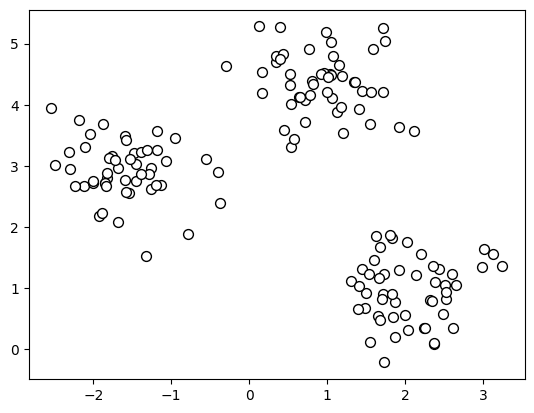

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolor='black', s=50)
plt.show()

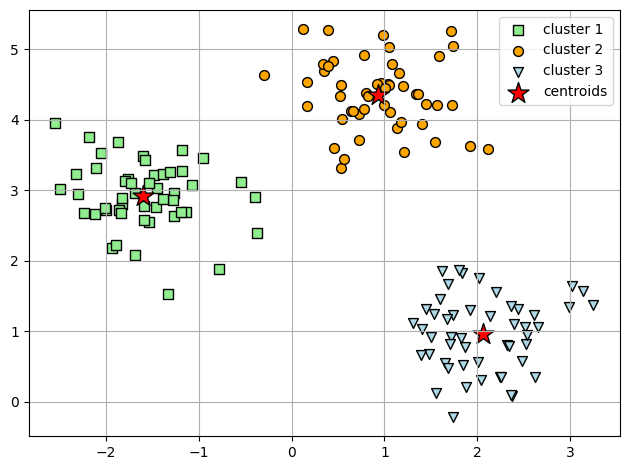

In [4]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, c='red', marker='*', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

### K-Means++

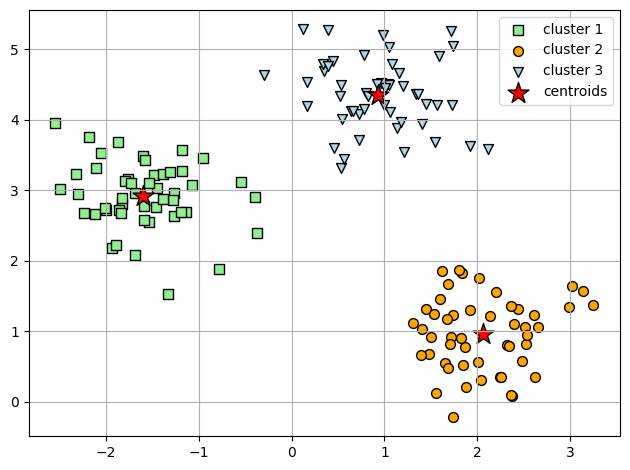

In [5]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, c='red', marker='*', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

## Soft Clustering

K-means is a hard clustering algorithm, meaning that each data point is assigned to a single cluster.
But soft or fuzzy clustering allows us to assign a data point to one or more clusters.

For example, Fuzzy C-Means (FCM) is a soft clustering algorithm that assigns a data point to multiple clusters. Each point is assigned a probability of belonging to each cluster.

The error function for FCM is given by:

$$
J_m = \sum_{i=1}^{n} \sum_{j=1}^{c} w_{ij}^m \|x_i - \mu_j\|_2^2
$$

Where $w_{ij}$ is the membership degree of data point $x_i$ to cluster $c_j$ and $m$ is a parameter that controls the fuzziness of the clustering.

The exponent $m$ is greater than 1, and the larger the value of $m$, the smaller the cluster membership $w_{ij}$ becomes, and the more fuzzy the clustering.

The cluster members probability is given by:

$$
w_{ij} = \left[\sum_{c=1}^k{\left(\frac{\|x_i - \mu_j\|}{\|x_i - \mu_c\|}\right)^{\frac{2}{m-1}}}\right]^{-1}
$$

An example if there were 3 clusters, would look like:

$$
w_{ij} = \left[\left(\frac{\|x_i - \mu_j\|}{\|x_i - \mu_1\|}\right)^{\frac{2}{m-1}} + \left(\frac{\|x_i - \mu_j\|}{\|x_i - \mu_2\|}\right)^{\frac{2}{m-1}} + \left(\frac{\|x_i - \mu_j\|}{\|x_i - \mu_3\|}\right)^{\frac{2}{m-1}}\right]^{-1}
$$

To center $\mu_j$ for each cluster, we need to solve the following equation,
which is calculated as the mean of all examples weighted by the degree to which each example belongs to that cluster:

$$
\mu_j = \frac{\sum_{i=1}^{n} w_{ij}^m x_i}{\sum_{i=1}^{n} w_{ij}^m}
$$